##**Gaussian Naive Bayes**

* Ao trabalhar com dados contínuos existe uma suposição muito comum de que os valores contínuos associados a cada classe são distribuídos de acordo com uma distribuição gaussiana, ou seja, uma distribuição normal.

* O link da documentação desse tipo de algoritmo é a seguinte: 
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

###**Aplicação do algoritmo Gaussian Naive Bayes - Caso 1**

* A base de dados utilizada é a iris e pode ser encontrada utilizando o sklearn.

In [ ]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

# Carregando a base de dados
dataset = datasets.load_iris()

# Classificador GNB
classifier = GaussianNB()

# Treinando o modelo
modelo = classifier.fit(dataset.data, dataset.target)

# Previsões feitas
prev = modelo.predict(dataset.data)

# Resultado
print('Total de exemplos visualizados: %d - Total de previsões incorretas: %d' % (dataset.data.shape[0], (dataset.target != prev).sum()))

Total de exemplos visualizados: 150 - Total de previsões incorretas: 6


###**Aplicação do algoritmo Gaussian Naive Bayes - Caso 2**

* A base de dados utilizada é a iris e pode ser encontrada utilizando o sklearn.

* Neste caso as métricas do modelo serão exploradas

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# Base de dados
dataset = datasets.load_iris()

# Classificador GNB
classifier = GaussianNB()

# Treinando o modelo
modelo = classifier.fit(dataset.data, dataset.target)
print(modelo)

# Previsões obtidas
observado = dataset.target
previsto = modelo.predict(dataset.data)

# Sumário final
print(metrics.classification_report(observado, previsto))
print('Matriz de confusão: \n', metrics.confusion_matrix(observado, previsto))

GaussianNB()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

Matriz de confusão: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


###**Aplicação do algoritmo Gaussian Naive Bayes - Caso 3**

* Neste caso será estudado um problema de classificação multiclasse. 

* Os dados utilizados foram criados de forma randômica.

* O objetivo está em classificar se o registro lido é de um urso, leoparrdo ou elefante utilizando o algoritmo Naive Bayes. 

In [ ]:
# Pacotes utilizados

import numpy as np
from random import random
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pylab as pl
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline

In [ ]:
# Massa de dados com a representação de 3 classe
leopardo_features = [(random() * 5 + 8, random() * 7 + 12) for x in range(5)]
urso_features = [(random() * 4 + 3, random() * 2 + 30) for x in range(4)]
elefante_features = [(random() * 3 + 20, (random() - 0.5) * 4 + 23) for x in range(6)]

# Input
X = urso_features + elefante_features + leopardo_features

# Output
y = ['urso'] * len(urso_features) + ['elefante'] * len(elefante_features) + ['leopardo'] * len(leopardo_features)

In [ ]:
X

[(4.03797890666331, 31.70384367208643),
 (4.124059936442356, 31.05517006997246),
 (4.482918792820814, 30.30047084633108),
 (5.088476316840505, 31.35021823926593),
 (21.83875835736494, 21.268035739184135),
 (22.708605786987924, 24.01449097899768),
 (20.955916324924313, 21.645226039773846),
 (21.920350576089607, 22.67004287894759),
 (20.87059684027161, 22.83282797982404),
 (21.467586298895654, 21.898514221213023),
 (12.985562038148894, 18.895471826329157),
 (11.312581675494656, 13.475662599123387),
 (11.654004952698, 18.072402404151337),
 (10.463896534862009, 15.52761229335365),
 (8.068407882973904, 14.290807380085795)]

In [ ]:
y

['urso',
 'urso',
 'urso',
 'urso',
 'elefante',
 'elefante',
 'elefante',
 'elefante',
 'elefante',
 'elefante',
 'leopardo',
 'leopardo',
 'leopardo',
 'leopardo',
 'leopardo']

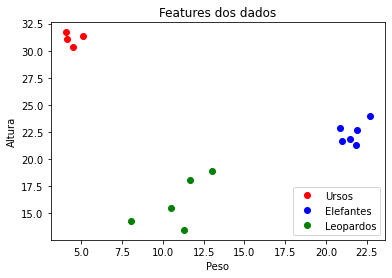

In [ ]:
# Plotando os dados
fig, axis = plt.subplots(1, 1)

# Classe 1
urso_weight, urso_height = zip(*urso_features)
axis.plot(urso_weight, urso_height, 'ro', label = 'Ursos')

# Classe 2
elefante_weight, elefante_height = zip(*elefante_features)
axis.plot(elefante_weight, elefante_height, 'bo', label = 'Elefantes')

# Classe 3
leopardo_weight, leopardo_height = zip(*leopardo_features)
axis.plot(leopardo_weight, leopardo_height, 'go', label = 'Leopardos')

# Eixos do gráfico
axis.legend(loc = 4)
axis.set_xlabel('Peso')
axis.set_ylabel('Altura')


# Exibição final
plt.title('Features dos dados')
plt.show()

In [ ]:
# Criando o modelo com os dados de treino
clf = GaussianNB()
clf.fit(X, y)

# Criando outros dados para teste
new_data = [[2, 3], [3, 31], [21, 23], [12, 16], [4, 34]]

# Previsões do modelo
print(clf.predict(new_data))
print('\n')
print(clf.predict_proba(new_data))

['leopardo' 'urso' 'elefante' 'leopardo' 'urso']


[[2.50195221e-297 1.00000000e+000 0.00000000e+000]
 [2.82033121e-210 3.02761136e-015 1.00000000e+000]
 [1.00000000e+000 5.74030359e-012 0.00000000e+000]
 [7.02067235e-062 1.00000000e+000 1.11862892e-257]
 [1.24989042e-201 2.01225132e-014 1.00000000e+000]]


###**Aplicação do algoritmo Gaussian Naive Bayes - Caso 4**

* Neste caso será estudado um problema de classificação multiclasse. 

* Os dados utilizados são do dataset Iris.

* O objetivo está em criar um modelo capaz de classificar as entradas com base no tipo de flor que ela é, além de exibir um gráfico que vai demonstrar a distribuição dos dados


In [ ]:
# Método responsável por criar o gráfico com base nos dados inseridos como atributos

def plot_classification_results(clf, X, y, title):
    # Divide o dataset em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    # Fit dos dados com o classificador
    clf.fit(X_train, y_train)

    # Cores para o gráfico
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h = .02  # Tamanho do step no meshgrid
    
    # Plot da fronteira de decisão.
    # Usando o meshgrid do NumPy e atribuindo uma cor para cada ponto 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Previsões do modelo
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Resultados em cada cor do plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot dos pontos de dados de treino
    pl.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cmap_bold)

    y_predicted = clf.predict(X_test)
    score = clf.score(X_test, y_test)
    pl.scatter(X_test[:, 0], X_test[:, 1], c = y_predicted, alpha = 0.5, cmap = cmap_bold)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.title(title)
    return score

Classes do Dataset:
[0 1 2]


Shape dos dados:
(120, 4) (120,)
(30, 4) (30,)


Score do modelo:


0.8333333333333334

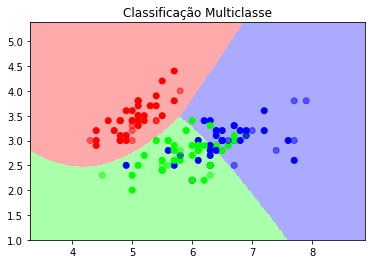

In [ ]:
# Pacotes utilizados
import numpy as np
from sklearn import datasets

# Dataset
iris = datasets.load_iris()

# Imprimindo as 3 classes do dataset
print('Classes do Dataset:')
print(np.unique(iris.target))
print('\n')

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Shape dos dados
print('Shape dos dados:')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print('\n')

# Classificador
clf = GaussianNB()

# Resultado
print('Score do modelo:')
plot_classification_results(clf, X_train[:, :2], y_train, "Classificação Multiclasse")

* O modelo obteve 83.3% de precisão nas previsões.

* É possível perceber no gráfico alguns dados que estão classificados no local errado.